<a href="https://colab.research.google.com/github/PWRScript/afterschool-machine-learning/blob/main/exercicios/Aula%202%20-%20Exercicio%20%20Parcialmente%20Resolvido%20-%20Preveja%20quem%20vai%20ganhar%20um%20jogo%20de%20xadrez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício parcialmente resolvido

## Problema

Neste exercício, pretendemos prever quem vai ganhar um jogo de xadrez. Para tal, vamos ter em consideração informações sobre o jogo, tais como o número de jogos, a classificação dos jogadores e o número de jogadas na fase de abertura.

## Dados

* Número de observações = 20058
* Número de variáveis independentes = 5
 * id = código de identificação do jogo
 * turns = número de jogadas
 * white_rating = classificação do jogador das peças brancas
 * black_rating = classificação do jogador das peças pretas
 * opening_ply = número de jogadas na fase de abertura
* Variável dependente = “winner”. Diz-nos se o vencedor foi o jogador das peças brancas, pretas ou se houve empate.

Dados disponíveis em: https://raw.githubusercontent.com/pmarcelino/datasets/master/chess_01.csv

## Instruções

Resolve o exercício tendo em consideração as pistas deixadas, como comentário, ao longo do código. Para tal, basta substituir os comentários com `[ ]` pelas instruções corretas. Algumas partes do exercício já estão resolvidas e, como tal, não requerem qualquer alteração.

# Resolução

In [2]:
# Importar bibliotecas 
import pandas as pd  
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score 

## 1. Preparação de dados

In [18]:
# Importar dados
df = pd.read_csv("https://raw.githubusercontent.com/pmarcelino/datasets/master/chess_01.csv")
df

,id,turns,winner,white_rating,black_rating,opening_ply
0,TZJHLljE,13,white,1500,1191,5
1,l1NXvwaE,16,black,1322,1261,4
2,mIICvQHh,61,white,1496,1500,3
3,kWKvrqYL,61,white,1439,1454,3
4,9tXo1AUZ,95,white,1523,1469,5
...,...,...,...,...,...,...
20053,EfqH7VVH,24,white,1691,1220,2
20054,WSJDhbPl,82,black,1233,1196,2
20055,yrAas0Kj,35,white,1219,1286,3
20056,b0v4tRyF,109,white,1360,1227,4


In [4]:
# Verificar se há dados em falta

df.isnull().sum()

id              0
turns           0
winner          0
white_rating    0
black_rating    0
opening_ply     0
dtype: int64

In [5]:
# Eliminar observações com dados em falta (caso necessário)

# Não é neceessário pois contém todos os dados

In [ ]:
# Verificar se há dados em falta (caso necessário)

# Não é neceessário pois contém todos os dados

## 2. Explorar dados

In [7]:
# Verificar se há erros e anomalias

df.describe()

,turns,white_rating,black_rating,opening_ply
count,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981
std,33.570585,291.253376,291.036126,2.797152
min,1.000000,784.000000,789.000000,1.000000
25%,37.000000,1398.000000,1391.000000,3.000000
50%,55.000000,1567.000000,1562.000000,4.000000
75%,79.000000,1793.000000,1784.000000,6.000000
max,349.000000,2700.000000,2723.000000,28.000000


In [ ]:
# Remover erros e anomalias (caso necessário)

# Não é neceessário pois não existem erros nem anormalias

In [8]:
# Criar variável que relacione 'white_rating' com 'black_rating'
df['ratio'] = df['white_rating'] / df['black_rating']
df

,id,turns,winner,white_rating,black_rating,opening_ply,ratio
0,TZJHLljE,13,white,1500,1191,5,1.259446
1,l1NXvwaE,16,black,1322,1261,4,1.048374
2,mIICvQHh,61,white,1496,1500,3,0.997333
3,kWKvrqYL,61,white,1439,1454,3,0.989684
4,9tXo1AUZ,95,white,1523,1469,5,1.036760
...,...,...,...,...,...,...,...
20053,EfqH7VVH,24,white,1691,1220,2,1.386066
20054,WSJDhbPl,82,black,1233,1196,2,1.030936
20055,yrAas0Kj,35,white,1219,1286,3,0.947900
20056,b0v4tRyF,109,white,1360,1227,4,1.108394


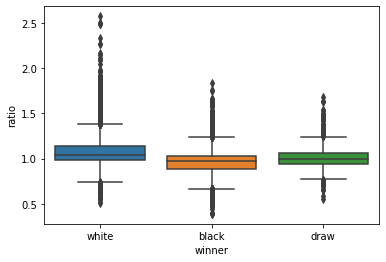

In [10]:
# Visualizar a relação entre 'winner' e 'ratio, usando um boxplot

sns.boxplot(x="winner", y="ratio", data=df)

* Sabendo que:
 * os valores de 'ratio' acima de 1 indicam que a classificação do jogador das peças brancas é maior que a do jogador das peças pretas,
 * que valores de 'ratio' abaixo de 1 indicam o contrário 
 * e que valores 'ratio' igual a 1 indicam que os jogadores têm a mesma classificação, 
 
 o gráfico apresentado faz sentido?

 Na minha opinião, estes gráficos fazem sentido pois os valores médios estão centralizados no ratio 1, em que para este fator acontecer requer que os jogador possuam "o mesmo nivel equilibrado de inteligência" executar estas jogadas. Devido ao facto de existirem jogadores com mais experiencia que outros podemos esperar valores mais baixos e mais altos de ratio

## 3. Treinar modelo

In [11]:
# Definir variáveis independentes e dependente
X = df[['turns', 'white_rating', 'black_rating', 'opening_ply']]
y = df['winner']

In [13]:
# Dividir dados em conjunto de dados de treino e de teste

X_train, x_test, y_train, y_test = train_test_split(X,y,random_state=5)

In [14]:
# Definir algoritmo do modelo

model = RandomForestClassifier(random_state=20)

In [15]:
# Treinar o modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=20)

## 4. Avaliar modelo

In [16]:
# Fazer previsões

y_pred = model.predict(x_test)

In [17]:
# Avaliar modelo usando a taxa de acerto como medida

accuracy_score(y_test, y_pred)

0.6673978065802593